In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
try:
    import csiborgtools
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import csiborgtools
import utils
%load_ext autoreload
%autoreload 2

import joblib
from os.path import join
from glob import glob

In [2]:
Nsim = 9844
simpath = csiborgtools.io.get_sim_path(Nsim)
Nsnap = 1016

outfname = join(utils.dumpdir, "ramses_out_{}_{}.npy".format(str(Nsim).zfill(5), str(Nsnap).zfill(5)))

mmain = csiborgtools.io.read_mmain(Nsim, "/mnt/zfsusers/hdesmond/Mmain")

data = np.load(outfname)
data = csiborgtools.io.merge_mmain_to_clumps(data, mmain)

data = data[(data["npart"] > 100) & np.isfinite(data["m200"])]

boxunits = csiborgtools.units.BoxUnits(Nsnap, simpath)

In [22]:
R = np.sqrt((data["peak_x"] - 0.5)**2 + (data["peak_y"] - 0.5)**2 + (data["peak_z"] - 0.5)**2)

In [29]:
boxunits.box2kpc(0.21) * 1e-3

201.86808958975962

<IPython.core.display.Javascript object>


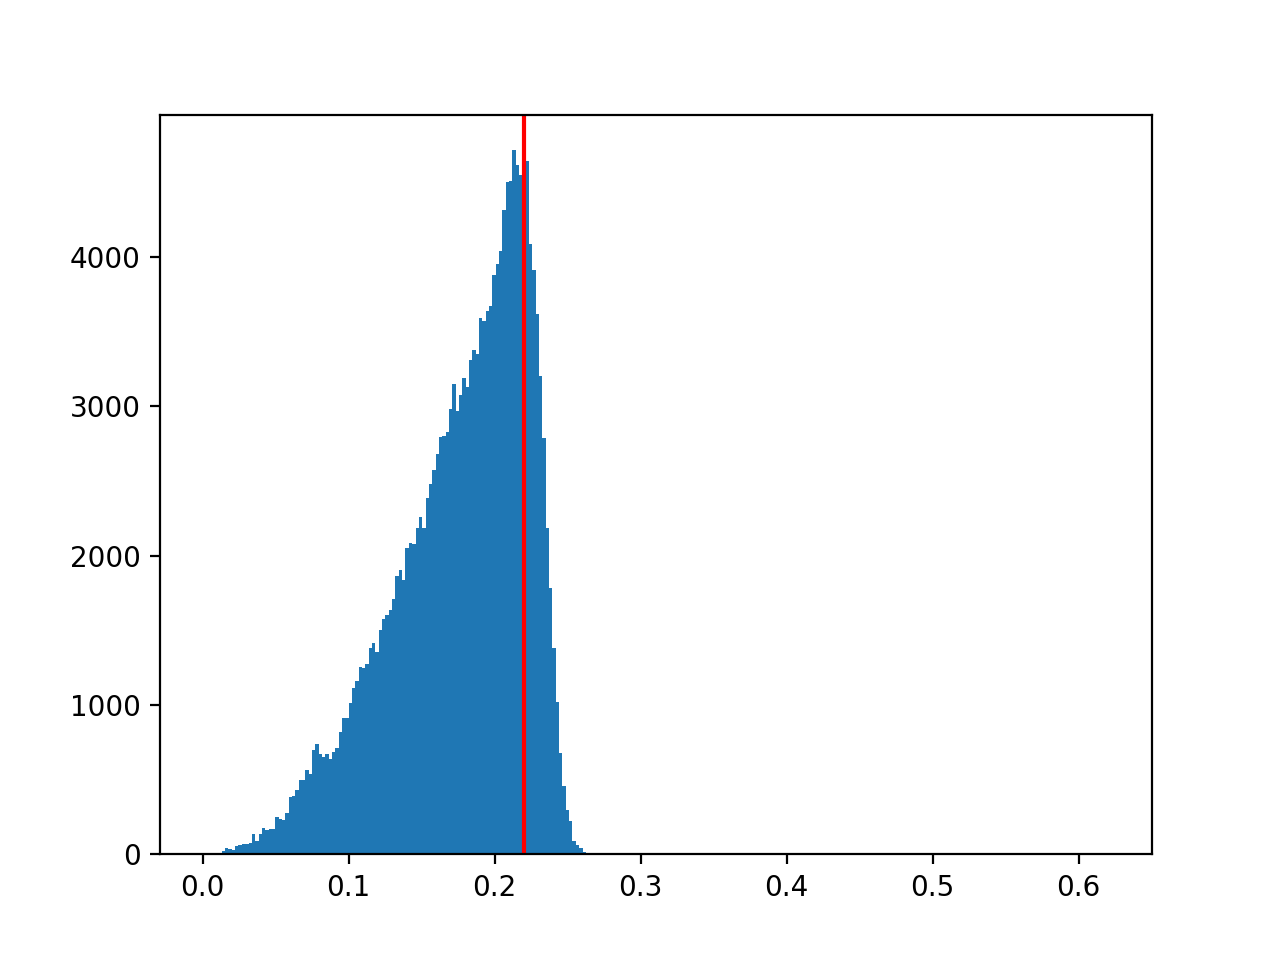

In [30]:
plt.figure()
plt.hist(R, bins="auto")

plt.axvline(0.22, c="red")

plt.show()

In [34]:
mass = boxunits.box2solarmass(data["m200"])



43830404417.54772

In [3]:
# Nsplit = 0
# loaddir = join(utils.dumpdir, "temp")
# parts, part_clumps, clumps = csiborgtools.fits.load_split_particles(
#     Nsplit, loaddir, Nsim, Nsnap, remove_split=False)

In [43]:
# n = 584
# xs = csiborgtools.fits.pick_single_clump(n, parts, part_clumps, clumps)
# halo = csiborgtools.fits.Clump.from_arrays(*xs, rhoc=boxunits.box_rhoc)
# print(halo.Npart)

1306
